In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('C:\\Users\\eyret\\OneDrive\\Karpov_courses\\Data_Analist\\Lessons_codes\\Lesson_3\\3_user_data.csv')

In [3]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs = (pd.
        read_csv
        ('C:\\Users\\eyret\\OneDrive\\Karpov_courses\\Data_Analist\\Lessons_codes\\Lesson_3\\3_logs.csv',
        parse_dates = ['time'])
       )

In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
logs.platform.nunique()

3

In [7]:
logs.shape

(4500, 4)

In [8]:
logs.platform.max()

'tablet'

In [9]:
# Which client(s) has had the largest number of succesfull transactions? 
(
    logs
    .query("success == True")
    .groupby('client')
    .agg({'platform': 'count'})
    .rename(columns={'platform':'successfull_transactions'})
    .sort_values('successfull_transactions', ascending = False)
    .query("successfull_transactions == 41")
    .sort_values('client', ascending = True)
    .reset_index()
)

,client,successfull_transactions
0,12179,41
1,28719,41
2,36165,41
3,52870,41
4,61468,41
5,61473,41
6,78349,41
7,82563,41
8,92584,41


In [10]:
# From which platform are the largest number of succesfull transactions carried out?
(
    logs
    .query("success == True")
    .groupby('platform')
    .agg({'client': 'count'})
)
# Answer - phone - 2019 successfull transactions

,client
platform,
computer,1090
phone,2019
tablet,180


In [11]:
# Which platform is most popular with premium customers?

client_and_logs = logs.merge(user_data, on = 'client', how = 'outer')
(
    client_and_logs
    .query('premium == True')
    .groupby('platform')
    .agg({'client' : 'count'})
)
# phone - 246 clients

,client
platform,
computer,150
phone,246
tablet,24


In [12]:
client_and_logs

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,61468,True,computer,1585460504,False,25.0
3,61468,True,computer,1585430291,False,25.0
4,61468,True,computer,1585444317,False,25.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN


E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

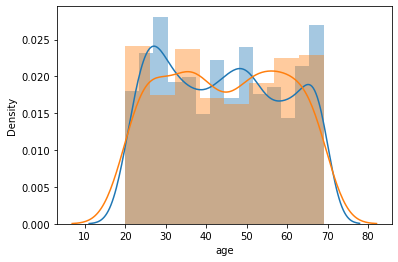

In [13]:
sns.distplot(client_and_logs.query('premium == False').age)
sns.distplot(client_and_logs.query('premium == True').age)

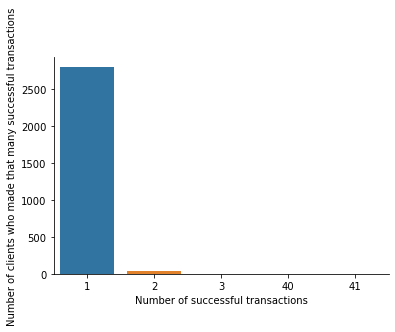

In [14]:
# Plot the distribution of the number of successful operations: 

# x - number of successful transactions
# y - number of clients who made that many successful transactions

for_plot = (
    client_and_logs
        .query("success == True")
        .groupby('client', as_index = False)
        .agg({'platform' : 'count'})
        .rename(columns={'platform':'successfull_transactions'})
        .groupby('successfull_transactions', as_index = False)
        .agg({'client' : 'count'})
)

ax = sns.barplot(x='successfull_transactions', y='client', data=for_plot)
ax.set(xlabel='Number of successful transactions', ylabel='Number of clients who made that many successful transactions')
sns.despine()  # убрать часть рамки графика
plt.show()

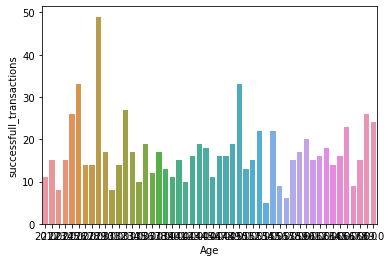

<Figure size 8640x5760 with 0 Axes>

In [15]:
# Visualise the number of successful operations performed on the computer platform
# as a function of age using sns.countplot. 
# The x-axis is age, the y-axis is the number of successful operations.

for_second_plot = (
    client_and_logs
        .query("platform == 'computer'")
        .query('success == True')
        .groupby('age', as_index = False)
        .agg({'time' : 'count'})
        .rename(columns={'time':'successfull_transactions'})
)
ax = sns.barplot(x='age', y= 'successfull_transactions', data = for_second_plot)
ax.set(xlabel='Age', ylabel='successfull_transactions')
plt.figure(figsize=(120, 80))
plt.show()

In [16]:
for_second_plot

,age,successfull_transactions
0,20.0,11
1,21.0,15
2,22.0,8
3,23.0,15
4,24.0,26
5,25.0,33
6,26.0,14
7,27.0,14
8,28.0,49
9,29.0,17
